<a href="https://colab.research.google.com/github/endangrusiana123/SLO/blob/main/TugasBesar/KNN_n10_Manhattan_Optimizer100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Besar SLO
<center>

**Kelompok 7**

**"Deep-Learning-Based Diagnosis of Cassava Leaf Diseases Using CNN"**

| No.| Nama | NIM |
|:-----:|:-----:|:-----:|
| 1.  |Endang Rusiana| 201012320036 |
| 2. |Rachelina Putri Arta S|201012320020|
| 3. |Iqbal Kurniawan Perdana|201012320002|
| 4. |Rizky Araffathia|201012320003|

</center>

# Preview dataset

mount G-drive

In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


show sample image

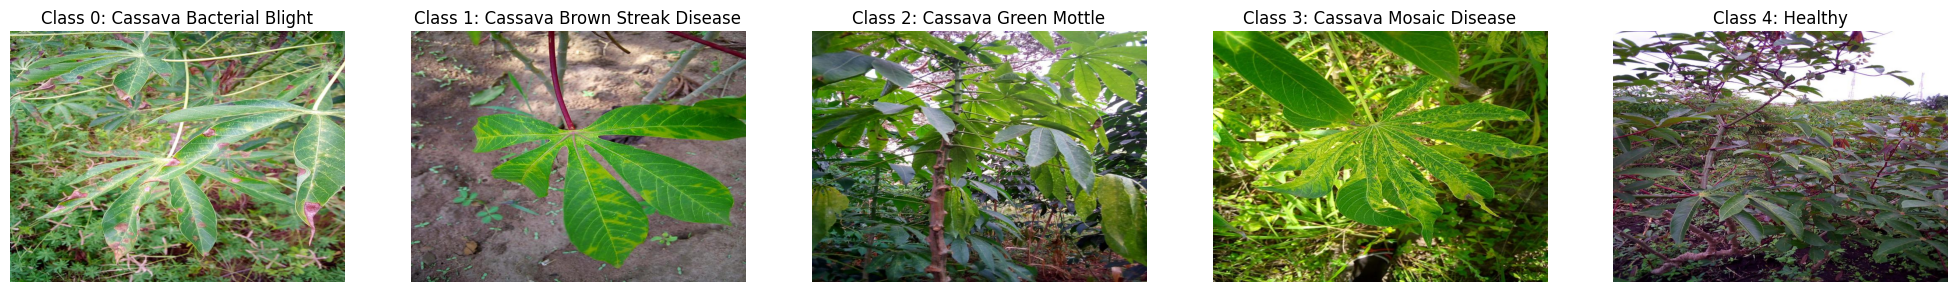

In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Mount Google Drive if your dataset is stored there
# from google.colab import drive
# drive.mount('/content/drive')

# Define the path to the dataset directory
dataset_dir = '/content/drive/MyDrive/Colab Notebooks/SLO/Tugas_Besar/Submit/used_dataset100/train'

# Define the class labels
class_labels = [
    'Cassava Bacterial Blight',
    'Cassava Brown Streak Disease',
    'Cassava Green Mottle',
    'Cassava Mosaic Disease',
    'Healthy'
]

# Prepare to collect one sample image from each class
sample_images = []
sample_labels = []
sample_class_numbers = []

# Loop through each class directory and collect one image
for class_index, class_label in enumerate(class_labels):
    class_dir = os.path.join(dataset_dir, str(class_index))
    if os.path.isdir(class_dir):
        for filename in os.listdir(class_dir):
            if filename.endswith(('jpg', 'jpeg', 'png')):
                image_path = os.path.join(class_dir, filename)
                sample_images.append(image_path)
                sample_labels.append(class_label)
                sample_class_numbers.append(class_index)
                break  # Take only one image per class

# Display the sample images
fig, axes = plt.subplots(1, 5, figsize=(25, 10))
for ax, image_path, label, class_number in zip(axes, sample_images, sample_labels, sample_class_numbers):
    img = Image.open(image_path)
    ax.imshow(img)
    ax.set_title(f'Class {class_number}: {label}')
    ax.axis('off')

plt.show()


# Augmentasi Data

In [3]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

# Directories
train_dir = '/content/drive/MyDrive/Colab Notebooks/SLO/Tugas_Besar/Submit/used_dataset100/train/'
validation_dir = '/content/drive/MyDrive/Colab Notebooks/SLO/Tugas_Besar/Submit/used_dataset100/validation/'
test_dir = '/content/drive/MyDrive/Colab Notebooks/SLO/Tugas_Besar/Submit/used_dataset100/test/'

# Function to load images from a directory
def load_images_from_folder(folder):
    images = []
    labels = []
    for class_label in os.listdir(folder):
        class_dir = os.path.join(folder, class_label)
        if os.path.isdir(class_dir):
            for filename in os.listdir(class_dir):
                img_path = os.path.join(class_dir, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    images.append(img)
                    labels.append(class_label)
    return images, labels

# Load training and validation datasets
train_images, train_labels = load_images_from_folder(train_dir)
validation_images, validation_labels = load_images_from_folder(validation_dir)
test_images, test_labels = load_images_from_folder(test_dir)

image_size = 384
# Function for image augmentation for training data
def augment_image_train(img):
    augmented_images = []
    img_resized = cv2.resize(img, (image_size, image_size))
    augmented_images.append(img_resized)

    # Vertical flip
    img_flipped_v = cv2.flip(img_resized, 0)
    augmented_images.append(img_flipped_v)

    # Horizontal flip
    img_flipped_h = cv2.flip(img_resized, 1)
    augmented_images.append(img_flipped_h)

    return augmented_images

# Function for augmenting all training images
def augment_images(images):
    augmented_images = []
    for img in images:
        augmented_images.extend(augment_image_train(img))
    return augmented_images

# Augment training images
augmented_train_images = augment_images(train_images)
augmented_train_labels = np.repeat(train_labels, 3)  # Repeat each label 4 times (for each augmentation)

# Function for resizing validation images
def resize_image_validation(img):
    return cv2.resize(img, (image_size, image_size))

# Resize validation images
resized_validation_images = [resize_image_validation(img) for img in validation_images]
# Resize validation images
resized_test_images = [resize_image_validation(img) for img in test_images]

# Flatten the images for KNN
X_train = [img.flatten() for img in augmented_train_images]
X_validation = [img.flatten() for img in resized_validation_images]
X_test = [img.flatten() for img in resized_test_images]

# Encode the labels
le = LabelEncoder()
y_train = le.fit_transform(augmented_train_labels)
y_validation = le.transform(validation_labels)
y_test = le.transform(test_labels)

# Convert lists to numpy arrays
X_train = np.array(X_train)
X_validation = np.array(X_validation)
X_test = np.array(X_test)

y_train = np.array(y_train)
y_validation = np.array(y_validation)
y_test = np.array(y_test)


#KNN n=10 metric=manhattan

Validation Accuracy: 0.21
Accuracy: 0.21
Classification Report:
               precision    recall  f1-score   support

         CBB       0.31      0.40      0.35        20
        CBSD       0.15      0.40      0.22        20
         CGM       0.29      0.20      0.24        20
         CMD       0.00      0.00      0.00        20
     Healthy       0.20      0.05      0.08        20

    accuracy                           0.21       100
   macro avg       0.19      0.21      0.18       100
weighted avg       0.19      0.21      0.18       100

Sensitivity (Recall): 0.5333333333333333
Specificity: 0.47058823529411764


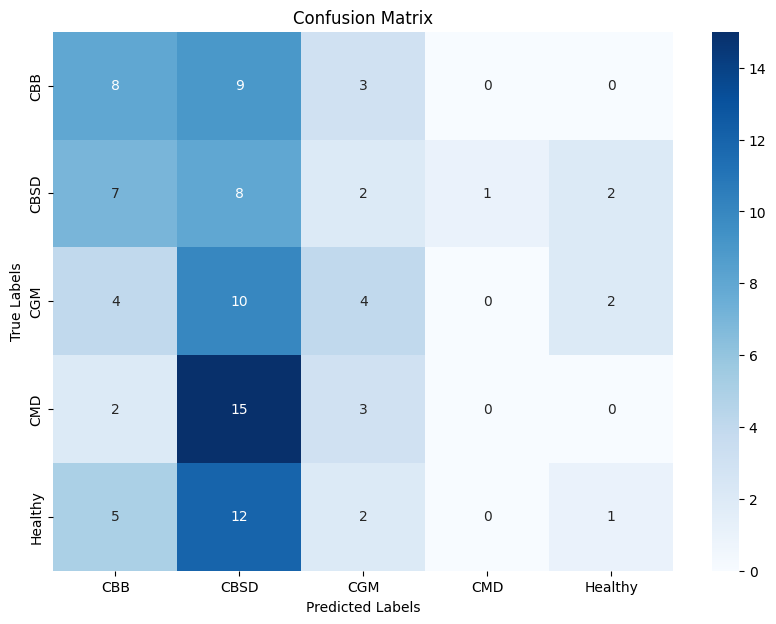

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors= 10, metric='manhattan')

# Train the model
knn.fit(X_train, y_train)

# Predict on the validation set
y_pred = knn.predict(X_validation)

# Calculate accuracy
accuracy = accuracy_score(y_validation, y_pred)
print(f'Validation Accuracy: {accuracy:.2f}')

# Calculate accuracy
accuracy = accuracy_score(y_validation, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_validation, y_pred)

target_names = ['CBB', 'CBSD', 'CGM', 'CMD', 'Healthy']
# Calculate classification report (includes precision, recall, f1-score)
class_report = classification_report(y_validation, y_pred, target_names=target_names)

# Extract sensitivity (recall) and specificity from the confusion matrix
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Display results
print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Testing

Validation Accuracy: 0.23
Accuracy: 0.23
Classification Report:
               precision    recall  f1-score   support

         CBB       0.33      0.45      0.38        20
        CBSD       0.21      0.60      0.31        20
         CGM       0.08      0.05      0.06        20
         CMD       0.00      0.00      0.00        20
     Healthy       0.25      0.05      0.08        20

    accuracy                           0.23       100
   macro avg       0.18      0.23      0.17       100
weighted avg       0.18      0.23      0.17       100

Sensitivity (Recall): 0.631578947368421
Specificity: 0.47368421052631576


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


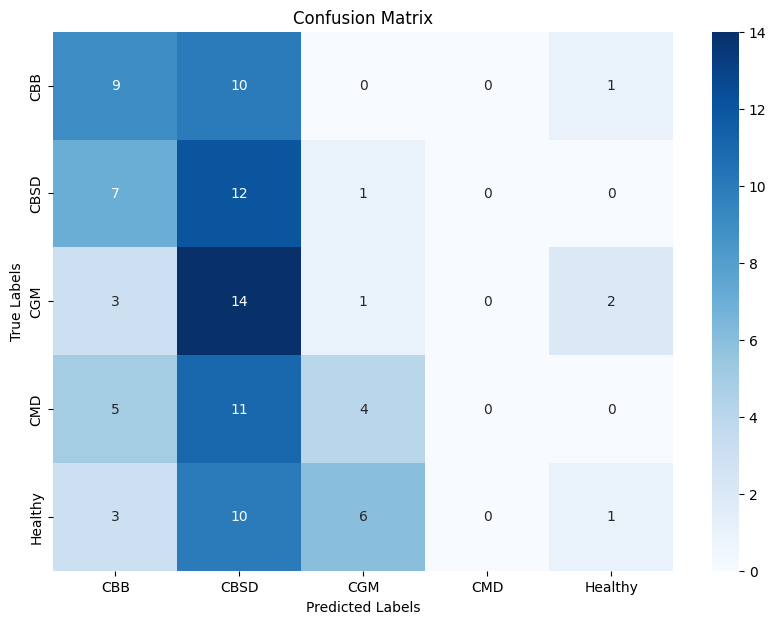

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Predict on the validation set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Validation Accuracy: {accuracy:.2f}')

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

target_names = ['CBB', 'CBSD', 'CGM', 'CMD', 'Healthy']
# Calculate classification report (includes precision, recall, f1-score)
class_report = classification_report(y_test, y_pred, target_names=target_names)

# Extract sensitivity (recall) and specificity from the confusion matrix
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Display results
print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()